In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Review_Data_All.xlsx


## Task 1 - Perform Basic Text Processing (Case Conversions, Punctuation Removal, Stop word Removal, Stemming, Lemmatization)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
data1 = pd.read_excel("../input/Review_Data_All.xlsx", sheet_name = 'Review Data')
#data1 = pd.read_excel('Review_Data_All.xlsx', sheetname = 'Review Data')
#data1 = pd.read_excel('Review_Data_All.xlsx')
data = data1.copy()
data.head()
data.shape # 295 rows and 5 columns.

# We have to process two columns - Review Paragraph and Review Title.

'''1. We do lower case conversion to words inside all the features(excpet date) to avoid multiple 
copies of the same word. '''

data['Review Paragarph'] = data['Review Paragarph'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Review Paragarph'].head()

data['Review Title'] = data['Review Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Review Title'].head()

'''2. Punctuation Removal '''

data['Review Paragarph'] = data['Review Paragarph'].str.replace('[^\w\s]','')
data['Review Paragarph'].head()

data['Review Title'] = data['Review Title'].str.replace('[^\w\s]','')
data['Review Title'].head()

''' 3. Stop Word Removal - We use predefined library to do this.'''

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['Review Paragarph'] = data['Review Paragarph'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Review Paragarph'].head()

data['Review Title'] = data['Review Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Review Title'].head()

''' 4. Stemming - We remove suffices, like “ing”, “ly”, “s”, etc '''

from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Review Paragarph'] = data['Review Paragarph'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['Review Paragarph'].head()
data['Review Title'] = data['Review Title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['Review Title'].head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0            horrend servic never recommend
1                              perfect dine
2                                 good food
3                                 work home
4    worst five star restaur test mani time
Name: Review Title, dtype: object

In [ ]:
'''5. Lemmatization - It reduces the word-forms to linguistically valid lemmas.'''
from textblob import Word
data['Review Paragarph'] = data['Review Paragarph'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review Paragarph'].head()
data['Review Title'] = data['Review Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review Title'].head()

## Task 2 - Find Top 10 High Frequency words.

In [6]:
# Task 2 - Top 10 high frequency words in Review Paragraph
freq = pd.Series(' '.join(data['Review Paragarph']).split()).value_counts()[:10]
print(freq)

food         159
good         129
servic       124
buffet        93
staff         85
restaur       84
breakfast     70
great         65
hotel         57
excel         54
dtype: int64


In [7]:
# Task 2 - Top 10 high frequency words in Review Title
freq = pd.Series(' '.join(data['Review Title']).split()).value_counts()[:10]
print(freq)

food         71
servic       51
good         49
great        45
excel        37
buffet       31
breakfast    27
restaur      21
247          20
spread       17
dtype: int64


## Task 3 - Use a polarity score for the cleaned review data to calculate the Percentage of Positive and Negative Reviews. (use polarity score threshold of 0 to classify positive and negative)

In [2]:
# One simple example of sentiment analysis
from textblob import TextBlob

TextBlob("not a very great calculation").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

In [8]:
# Analysis in Review Title
from textblob import TextBlob
pos_counts = 0
neg_counts = 0
for i in data['Review Title']:
#    print(TextBlob(i).sentiment[0])
    if TextBlob(i).sentiment[0] > 0:
        pos_counts +=1
    else:
        neg_counts +=1
print(f'positive counts is {pos_counts}')    
print(f'negative counts is {neg_counts}')
print(f'positive percentage is {pos_counts*100/(pos_counts+neg_counts)}')
print(f'negative percentage is {neg_counts*100/(pos_counts+neg_counts)}')

positive counts is 134
negative counts is 161
positive percentage is 45.42372881355932
negative percentage is 54.57627118644068


In [10]:
# Analysis in Review Paragraph
from textblob import TextBlob
pos_counts = 0
neg_counts = 0
for i in data['Review Paragarph']:
#    print(TextBlob(i).sentiment[0])
    if TextBlob(i).sentiment[0] > 0:
        pos_counts +=1
    else:
        neg_counts +=1
print(f'positive counts is {pos_counts}')    
print(f'negative counts is {neg_counts}')
print(f'positive percentage is {pos_counts*100/(pos_counts+neg_counts)}')
print(f'negative percentage is {neg_counts*100/(pos_counts+neg_counts)}')

positive counts is 234
negative counts is 61
positive percentage is 79.32203389830508
negative percentage is 20.677966101694917


## Task 4 - Use Polarity score of 0 to classify reviews Positive and Negative. Use this as the target variable. [Binary Encode]

In [11]:
# We assign Positive reviews value 1 and negative reviews value 0.
from textblob import TextBlob

lis = []
for i in data['Review Title']:
#    print(TextBlob(i).sentiment[0])
    if TextBlob(i).sentiment[0] > 0:
        lis.append(1)
    else:
        lis.append(0)


In [16]:
print(lis)

[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]


In [12]:
data['Sentiment'] = lis # Creating a Target variable

In [13]:
data.head()

,Rating,Review Date,Review Paragarph,Review Title,Site,Sentiment
0,1,2019-05-01,went 247 lalit hotel fine tast servic diminish...,horrend servic never recommend,TripAdvisor,0
1,5,2019-05-01,must visit great staff great manag food qulat ...,perfect dine,TripAdvisor,1
2,4,2019-03-01,food good breakfast good varieti open littl ea...,good food,TripAdvisor,1
3,5,2019-04-01,amaz staff purpos visit busi import meet sinc ...,work home,TripAdvisor,0
4,1,2019-04-01,hi must wonder test mani time lalit loyalti me...,worst five star restaur test mani time,TripAdvisor,0


In [14]:
data.Sentiment.value_counts()

0    161
1    134
Name: Sentiment, dtype: int64

Histogram of number of positive and negative reviews.

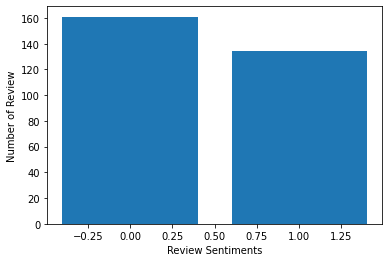

In [15]:
import matplotlib.pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Review Title'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Task 5 - Train logistic regression model on this dataset to identify postive and negative reviews.

In [17]:
# We convert text into numbers in order to train it in ML algorithm.
# Below Code generates document term matrix by using scikit-learn's CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from our data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Review Title'])


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Logistic Regression.
clf = logistic.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.9213483146067416


## We get the Logistic Regression Accuracy of 0.9213483. This is a good accuracy. 